<img src="san-francisco.jpg" alt="Drawing" style="width: 700px;"/>
<center>
<h1 style="font-size:36px;">San Francisco Crime Data Analysis</h1>
<h4> Erkai Zhang</h4>
<hr>
<h1>Introduction</h1>
</center>
<body><p>
San Francisco is a place many people's dream place to work at and live in. But with rising wealth inequality and housing shortages, there is no scarcity of crime in the city by the bay. Thus the questions are being asked: What types of crimes happened the most and where and when do they happen most often? How does public safety varies from place to place? So in this tutorial, we will analyze crime data from 1/1/2003 to 5/13/2015 and answer the question above and hopefully you could have a better idea about San Francisco crime activities and public safety from our analysis.  
<p> 
In this tutorial, we will first prepare, analyze, and visualize the crime data. Then we could interpret the data and make conclusion. 
<hr>
<center><h1>Getting Started</h1></center>
<body><p>
We will be using Python 3 in <a href = "https://jupyter.org">Jupyter Notebook</a> along with a few imported libraries: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href="https://docs.scipy.org/doc/numpy/user/">numpy</a>, <a href="https://matplotlib.org/contents.html">matplotlib</a>, <a href="http://scikit-learn.org/stable/documentation.html">scikit-learn</a>, <a href="https://seaborn.pydata.org/">seaborn</a>.
Below is the import code and their abbreviation we used in our tutorial.
</body>

In [157]:
import pandas as pd
from IPython.display import Math
import matplotlib.pyplot as plt
import seaborn as sns;

<body>
<h2>Preprocessing the Data</h2>
<p>
Thanks to <a href = "https://www.kaggle.com/c/sf-crime/data">Kaggle</a> and <a href = "https://datasf.org/opendata/">DataSF</a>, the data is prepared into a CSV (Comma Separated Value) file. We could read the CSV files using Pandas, with the ',' being the seperator. Some of the CSV file could also seperated by ';' or '  '(space), simply changed the 'sep' paramter would be good. Panda could also accept excel file or text file. If you want to parse other type of data file, you could read more from <a href = "https://pandas.pydata.org/pandas-docs/stable/io.html">here</a>.
</body>

In [158]:
df = pd.read_csv("crime_san_francisco.csv", sep = ',')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In the above processed data frame, there are 9 columns:
* Dates - timestamp of the crime incident
* Category - category of the crime incident:
    * ARSON
    * ASSAULT 
    * BAD CHECKS (Fraudulent check or intentionally write check that has insufficient fund)
    * BRIBERY 
    * BURGLARY 
    * DISORDERLY CONDUCT 
    * DRIVING UNDER THE INFLUENCE
    * DRUG/NARCOTIC DRUNKENNESS
    * EMBEZZLEMENT
    * EXTORTION
    * FAMILY OFFENSES
    * FORGERY/COUNTERFEITING
    * FRAUD
    * GAMBLING
    * KIDNAPPING
    * LARCENY/THEFT
    * LIQUOR LAWS
    * LOITERING
    * <span style="background-color: #FFFF00">MISSING PERSON</span>
    * <span style="background-color: #FFFF00">NON-CRIMINAL</span>
    * <span style="background-color: #FFFF00">OTHER OFFENSES</span>
    * PORNOGRAPHY/OBSCENE MAT
    * PROSTITUTION
    * <span style="background-color: #FFFF00">RECOVERED VEHICLE</span>
    * ROBBERY
    * RUNAWAY
    * SECONDARY CODES
    * SEX OFFENSES FORCIBLE
    * SEX OFFENSES NON FORCIBLE
    * STOLEN PROPERTY
    * <span style="background-color: #FFFF00">SUICIDE</span>
    * <span style="background-color: #FFFF00">SUSPICIOUS OCC</span>
    * TREA (Trespassing or loitering near posted industrial property)
    * TRESPASS
    * VANDALISM
    * VEHICLE THEFT
    * <span style="background-color: #FFFF00">WARRANTS</span>
    * WEAPON LAWS 
* Descript  - detailed description of the crime incident
* DayOfWeek - the day of the week
* PdDistrict - name of the Police Department District
* Resolution - how the crime incident was resolved
* Address - the approximate street address of the crime incident 
* X - longitude
* Y - latitude

<h2> Tidying and Wrangling the Data </h2>
<p> It is very rare that our give data is perfect for doing analysis without any modification. 
<p>Then let's  take a look at our dataframe size:

In [159]:
df.size

7902441

<p> Whoa! Our data frame has size around 8 million. That's a lot of data, in fact, more than enough for us to analyze and for our machines to handle (especially for visualization later). 
<br />If we want to do analysis, what we want here is a portion of our population, aka sampling.
Be careful, our sampling should be a random sample and our sample size shouldn't be too small, because we still want to correctly represent the underlying population.<br />
Good thing is that panda dataframe has <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html">built in sample function</a> that conduct a random sample without creating any bias.
Here, we conduct sampling at a fraction of one-tenth of the population. Which still leaves us a feasible and decent size to conduct analysis on. 

In [160]:
df = df.sample(frac=0.1)
df.size

790245

 <p>   
    Now we have a appropiate sized dataframe to work with. However, it's often that our dataframe has irrelevant information to our topics and analysis. In our case, if we want to analyze criminal activities, these few crime categories are not related to our analysis:
<br /> 
  <ul>
      <li>NON-CRIMINAL</li>
      <li>OTHER OFFENSES</li>
      <li>RECOVERED VEHICLE</li>
      <li>SUICIDE</li>
      <li>SUSPICIOUS OCC</li>
      <li>WARRENT</li>
  </ul>
<p> Notice this is open-ended and you have to use common sense. I think NON_CRMINAL, RECOVERED VEHICLE, SUICIDE and SUSPICIOUS OCCURANCE data would not help us to understand San Francisco public safety condition. Also OTHER OFFENSES and WARRANT are not informative enough for us to interpret and make a conclusion.<br /> Thus, we will remove the above rows from our dataframes:
    

In [161]:
df = df[(df.Category != 'NON-CRIMINAL') & (df.Category != 'OTHER OFFENSES') &
        (df.Category != 'RECOVERED VEHICLE') & (df.Category != 'SUICIDE') & 
        (df.Category != 'SUSPICIOUS OCC') & (df.Category != 'WARRANTS') ]
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
509827,2008-03-07 07:48:00,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,TENDERLOIN,"ARREST, BOOKED",TURK ST / TAYLOR ST,-122.410769,37.783215
876923,2003-01-08 15:53:00,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,RICHMOND,NONE,600 Block of FUNSTON AV,-122.471369,37.775945
137988,2013-07-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Saturday,PARK,NONE,ANZAVISTA AV / ENCANTO AV,-122.443467,37.779584
207254,2012-08-10 23:51:00,WEAPON LAWS,POSS OF DEADLY WEAPON WITH INTENT TO ASSAULT,Friday,TARAVAL,JUVENILE BOOKED,400 Block of ORIZABA AV,-122.462549,37.715882
259106,2011-11-14 21:20:00,DRUG/NARCOTIC,TRANSPORTAION OF CONTROLLED SUBSTANCE,Monday,BAYVIEW,"ARREST, BOOKED",CORTLAND AV / BAY SHORE BL,-122.406980,37.739567


<p> Also some colums are irrelvant</p>
<ul>
      <li>Descript</li>
      <li>PdDistrict</li>
      <li>Resolution</li>
      <li>Address</li>
  </ul>
Again, our tutorial focuses more on the criminal activities categories so we discard Descript, district and Resolution. I also get rid of the address because we already have X as longgitude and Y as latitude, which is enough for us to track the location. So we simply drop these columns:

In [162]:
df = df.drop(columns=['Descript', 'PdDistrict', 'Resolution', 'Address'])
display(df.head())

,Dates,Category,DayOfWeek,X,Y
509827,2008-03-07 07:48:00,DRUG/NARCOTIC,Friday,-122.410769,37.783215
876923,2003-01-08 15:53:00,BURGLARY,Wednesday,-122.471369,37.775945
137988,2013-07-13 23:00:00,LARCENY/THEFT,Saturday,-122.443467,37.779584
207254,2012-08-10 23:51:00,WEAPON LAWS,Friday,-122.462549,37.715882
259106,2011-11-14 21:20:00,DRUG/NARCOTIC,Monday,-122.406980,37.739567


<p>Great! Now the dataframe has no irrelavant columns. However, there is one more thing to do.
Observe how the dates are being represented here, it's year-month-day then hours-minutes-second. This entire chunk of data is inside of a single cell, which is not easy to work with. We want to separate them into four columns: Year, Month, Day and Hour because minutes and seconds are not signifcant enough to make a difference:



In [163]:
# A typical Dates here would look like : 2011-08-13 19:15:00
df['Year'] = ""
df['Month'] = ""
df['Day'] = ""
df['Hour'] = ""
df['Minute'] = ""
for index, row in df.iterrows():
    (dates, time) = row['Dates'].split(' ')
    (year, month, day) = dates.split('-')
    (hour, minute, second) = time.split(':')
    df.at[index, 'Year'] = year
    df.at[index,'Month'] = month
    df.at[index,'Day'] = day
    df.at[index,'Hour'] = hour
    df.at[index, 'Minute'] = minute
df.head()

,Dates,Category,DayOfWeek,X,Y,Year,Month,Day,Hour,Minute
509827,2008-03-07 07:48:00,DRUG/NARCOTIC,Friday,-122.410769,37.783215,2008,03,07,07,48
876923,2003-01-08 15:53:00,BURGLARY,Wednesday,-122.471369,37.775945,2003,01,08,15,53
137988,2013-07-13 23:00:00,LARCENY/THEFT,Saturday,-122.443467,37.779584,2013,07,13,23,00
207254,2012-08-10 23:51:00,WEAPON LAWS,Friday,-122.462549,37.715882,2012,08,10,23,51
259106,2011-11-14 21:20:00,DRUG/NARCOTIC,Monday,-122.406980,37.739567,2011,11,14,21,20


<p> First, df['column'] = "" creates empty column in our dataframe. Then we step through each row of dataframe by calling <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html">df.iterrows()</a>. While we step through each row, we keep track the index and row object. Then we split the row['Dates'] value into dates and time, notice <a href = "https://www.geeksforgeeks.org/python-string-split/">split()</a> will return a tuple. We do the same thing for dates and time, separating them into year, month, day, hour and minute, then put them into the previous created empty columns. <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.at.html">df.at</a> will set a specific value(modiying the dataframe inplace) to the cell at [row, column]. 
<p> Perfect! Compared with the previous result, this time our dataframe has Year, Month, Day, Hour, and Minute
    columns that keep track these dates separately. Now we may begin our exploratory data analysis and data visualization.

<hr>
<center><h1>Exploratory Data Analysis and Data Visualization</h1></center>

<h2> Prepare our data </h2>
<p> The central theme of our analysis would be revolved around four variables:
    <ul>
      <li>Location</li>
      <li>Time</li>
      <li>Crime Frequency
      <li>Crime Category</li>
  </ul>
<p>By the end of this analysis, we should know: when, where, and what kind of crimes happened often and how do they change over time. Then we can interpret and make hypothetical policy decision base on top of this analysis. <br />
Let's first take a look at each type of crime's frequency. <a href = "count value function in excel">value_counts()</a> here return each crime category's frequency.

In [164]:
freq_count = df['Category'].value_counts()
print(freq_count)

LARCENY/THEFT                  17504
ASSAULT                         7615
DRUG/NARCOTIC                   5433
VEHICLE THEFT                   5280
VANDALISM                       4490
BURGLARY                        3695
MISSING PERSON                  2577
ROBBERY                         2321
FRAUD                           1602
FORGERY/COUNTERFEITING          1048
SECONDARY CODES                 1007
WEAPON LAWS                      849
PROSTITUTION                     764
TRESPASS                         747
DISORDERLY CONDUCT               474
DRUNKENNESS                      452
SEX OFFENSES FORCIBLE            428
STOLEN PROPERTY                  419
KIDNAPPING                       239
DRIVING UNDER THE INFLUENCE      219
RUNAWAY                          195
LIQUOR LAWS                      183
ARSON                            137
LOITERING                        117
EMBEZZLEMENT                     112
FAMILY OFFENSES                   57
EXTORTION                         35
B

</p> Now we have a clear image of what the top crimes are. 
Let's focus on the top 6 crimes since it made up 83% of the total crime. df.value_counts() return a <a href = "https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.html">panda Series</a>, which is a unique object type that support list operator.
If we only want the top 6 crimes, we will use a ':', a "slice" operator. This is very useful and easy to work with. <a href = "https://www.pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/">Here</a> is more information about python slice operator.

In [165]:
top6_crime = freq_count[0:6]
print(top6_crime)

LARCENY/THEFT    17504
ASSAULT           7615
DRUG/NARCOTIC     5433
VEHICLE THEFT     5280
VANDALISM         4490
BURGLARY          3695
Name: Category, dtype: int64


<p>Let's make a new dataframe that only has these types of crimes. Notice we changed our logical operator to '|' this time.

In [166]:
top6_df = df[(df.Category == 'LARCENY/THEFT') | (df.Category == 'ASSAULT') |
        (df.Category == 'DRUG/NARCOTIC') | (df.Category == 'VEHICLE THEFT') | 
        (df.Category == 'VANDALISM') | (df.Category == 'BURGLARY') ]
top6_df.head()

,Dates,Category,DayOfWeek,X,Y,Year,Month,Day,Hour,Minute
509827,2008-03-07 07:48:00,DRUG/NARCOTIC,Friday,-122.410769,37.783215,2008,03,07,07,48
876923,2003-01-08 15:53:00,BURGLARY,Wednesday,-122.471369,37.775945,2003,01,08,15,53
137988,2013-07-13 23:00:00,LARCENY/THEFT,Saturday,-122.443467,37.779584,2013,07,13,23,00
259106,2011-11-14 21:20:00,DRUG/NARCOTIC,Monday,-122.406980,37.739567,2011,11,14,21,20
567939,2007-05-04 19:30:00,VANDALISM,Friday,-122.391090,37.735905,2007,05,04,19,30


<p> To help us visualize, we can make a pie chart that labels each of the 6 categories and their frequency in percentages. I am using the default panda dataframe <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html">'.plot'</a> function. The variable "autopct" enables us to display the percentage value using Python string formatting. If you want to know more about it, <a href = "https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct">Here</a> is a really helpful answers on stackoverflow.

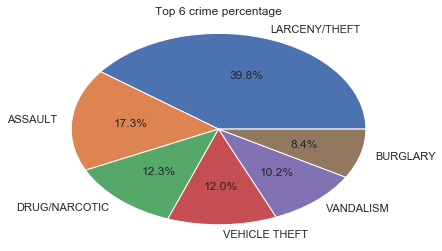

In [167]:
pie_chart = top6_df['Category'].value_counts().plot(kind='pie', title = "Top 6 crime percentage", autopct='%1.1f%%', radius = 1.1)
pie_chart.set_ylabel('')
pie_chart

<h2> Data Analysis</h2>
<p> We may now begin our analysis. This section is dedicated to analyzing the time factor of the above crime categories. First, let's graph these top 6 crimes by their changes over the years.

In [168]:
count_crime = top6_df.groupby(['Year', 'Category']).size()
top6_year_df = count_crime.to_frame(name = "Freq").reset_index()
display(top6_year_df.head())

,Year,Category,Freq
0,2003,ASSAULT,641
1,2003,BURGLARY,327
2,2003,DRUG/NARCOTIC,465
3,2003,LARCENY/THEFT,1257
4,2003,VANDALISM,328


<p> This part is a bit tricky. If we want analyze crime frequency change over time, we want each year's each of the top 6 crime's frequency. So we call <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html">groupby()</a> function to group two varaible: Year and Category. It will return the combination of each year and each of the top 6 crime. How do we count the occurrences? The size of each crime group within each year will give you the occurrence. We then convert it to a panda dataframe by using .to_frame function and reset the index to 0. We can now graph it in using <a href = "https://seaborn.pydata.org/generated/seaborn.lineplot.html">seaborn.lineplot</a>.


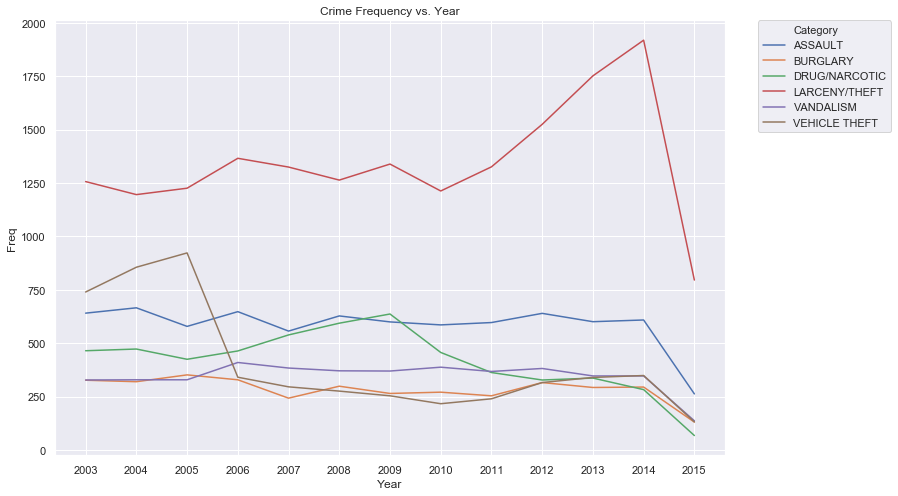

In [169]:
plt.subplots(figsize=(12,8)) # change our graph dimension
ax = sns.lineplot(x="Year", y="Freq", hue = "Category", data= top6_year_df).set_title("Crime Frequency vs. Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # change our legend position
plt.show()

<p> Now we have the Crim Frequency vs. Year graph for our top 6 crimes. We can see LARCENY/THEFT has consistantly been the most common crime. VEHICLE THEFT starts off very high but suddenly dropped in 2006. The most recent data from 2014-2015 shows all the crime has a significant decrease. This is interesting and Let's do the same for Month, Day and Hour:

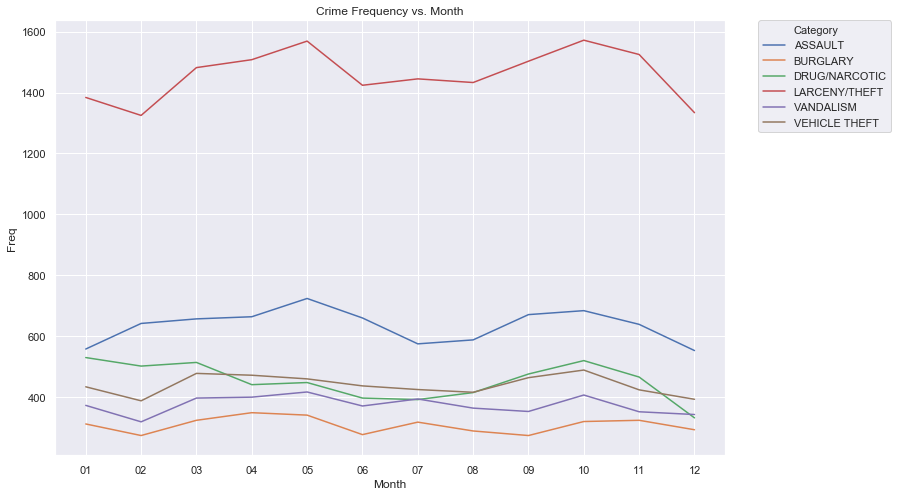

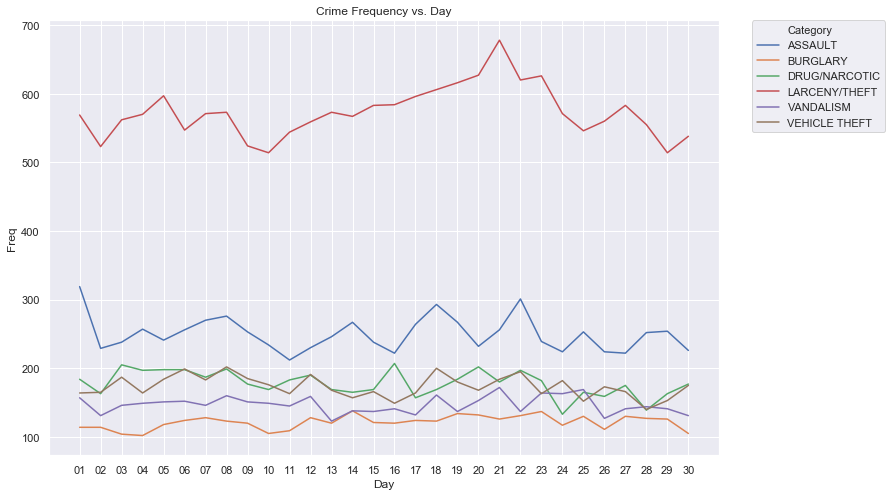

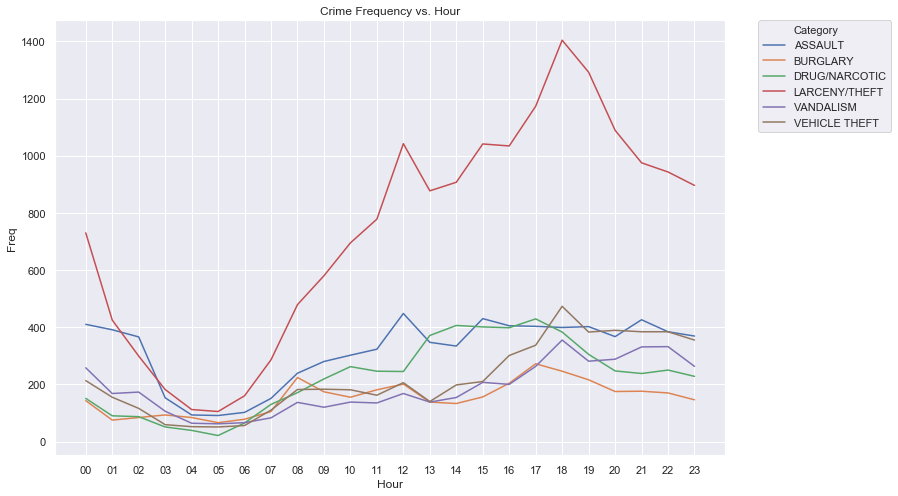

In [170]:
# Groupby Month and Category
count_crime = top6_df.groupby(['Month', 'Category']).size()
top6_month_df = count_crime.to_frame(name = "Freq").reset_index()
plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Month", y="Freq", hue = "Category", data= top6_month_df).set_title("Crime Frequency vs. Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
# Groupby Day and Category
count_crime = top6_df.groupby(['Day', 'Category']).size()
top6_day_df = count_crime.to_frame(name = "Freq").reset_index()
# We want to drop the 31st day because there are less month with 31st day
# Thus creating bias when accumulating data
top6_day_df = top6_day_df[top6_day_df.Day != '31'] 
plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Day", y="Freq", hue = "Category", data= top6_day_df).set_title("Crime Frequency vs. Day")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
# Groupby Hour and Category
count_crime = top6_df.groupby(['Hour', 'Category']).size()
top6_hour_df = count_crime.to_frame(name = "Freq").reset_index()
plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Hour", y="Freq", hue = "Category", data= top6_hour_df).set_title("Crime Frequency vs. Hour")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<p>If we look at these graphs, we can see some trend here and there. However, excluding LARCENY/THEFT, other crimes here seems very close to one and others. If we want to predict trend and interpret these data, we want to regression analysis. But regression analysis assumes the underlying data being continuous instead of categorical. The way our time is shown on the graph is discrete (like from 0, 1, 2,... hours during the day) instead of continuous. Thus, what we need is data transformation to help us transform our time data to a continuous variable. 

<h2>Data Transformation</h2>
<p> Data transformation is a general way to changes the format or structure of the data to help us observe and conduct the analysis. Data transformation has multiple methods, I recommend you to read <a href = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043340/">this article</a>. <br /> For our tutorial, we want our time to be a continuous variable instead of categorical. However, the given dates format is impossible to be read as continuous. For example, we want to graph Crime vs. Hours, but our minute is out of 60. It will discontinuous after 60 minutes and wrap around back to 0. Also, it's a string variable. Thus, we need to quantify these variables and change them to integers. The best way I could think of is express them in a floating-point format. For example 1:30 (1 hour and 30 minutes) should be converted to 1.5 hours. That way we have continuous variable and help us to conduct regression analysis later on.


In [171]:
df['total_days'] = ""
df['hours of the day'] = ""
for index, row in df.iterrows():
    df.at[index, 'total_days'] = (int(row['Month']) - 1)*30 + int(row['Day']) # Janurary 15th should only be convert to 15 days
    df.at[index,'hours of the day'] = int(row['Hour']) + int(row['Minute'])/60
df.head()

,Dates,Category,DayOfWeek,X,Y,Year,Month,Day,Hour,Minute,total_days,hours of the day
509827,2008-03-07 07:48:00,DRUG/NARCOTIC,Friday,-122.410769,37.783215,2008,03,07,07,48,67,7.8
876923,2003-01-08 15:53:00,BURGLARY,Wednesday,-122.471369,37.775945,2003,01,08,15,53,8,15.8833
137988,2013-07-13 23:00:00,LARCENY/THEFT,Saturday,-122.443467,37.779584,2013,07,13,23,00,193,23
207254,2012-08-10 23:51:00,WEAPON LAWS,Friday,-122.462549,37.715882,2012,08,10,23,51,220,23.85
259106,2011-11-14 21:20:00,DRUG/NARCOTIC,Monday,-122.406980,37.739567,2011,11,14,21,20,314,21.3333


<p> Nice, now we get to the fun part.

<h2>Linear Regression and Hypothesis Testing<h2>
<p>